In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
from umap.umap_ import UMAP


C:\Users\timgr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)
# df =df.dropna(axis='columns')
df = df.dropna(axis=1)  # Drop columns with all NaN values

Dataset shape: (532, 34507)
Number of healthy samples: 266
Number of cancer samples: 266
Number of components needed for 95% variance: 379
Number of components needed for 95% variance: 379


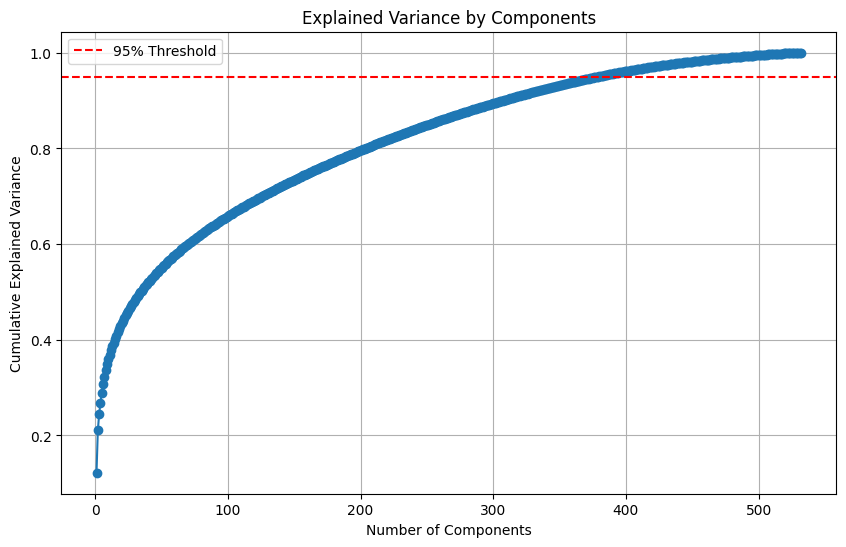

PCA transformed data shape: (532, 380)
        PC_1       PC_2       PC_3       PC_4       PC_5       PC_6      PC_7  \
0   5.210556  11.059916  17.252827  18.261126  -4.153713  20.871927 -4.894898   
1 -43.816061 -32.448901  -7.234487  -1.894422  -5.631835  -8.076099 -3.180344   
2  18.857868  23.966113  -3.559169  -7.778826   4.928370  19.735266  1.157533   
3   0.851403  31.206133  13.866736   4.930927 -11.887553  -5.407358 -0.443252   
4   0.418840   4.179210  -7.994914   3.654281 -21.900984 -10.161663  2.782788   

        PC_8       PC_9      PC_10  ...    PC_371    PC_372    PC_373  \
0  -3.668876 -23.580368  13.442101  ...  0.239317  0.209067 -0.278891   
1  -3.428929  17.529788   4.087016  ... -0.132879  0.630139 -4.805505   
2 -10.538048  -8.516161   6.649942  ...  0.226252  1.614189  0.043166   
3 -17.200660  38.390635  14.452466  ... -0.472032  1.664303  1.350003   
4  17.126584 -13.734918  -7.613672  ... -2.184299  0.640390 -0.864509   

     PC_374    PC_375    PC_376    

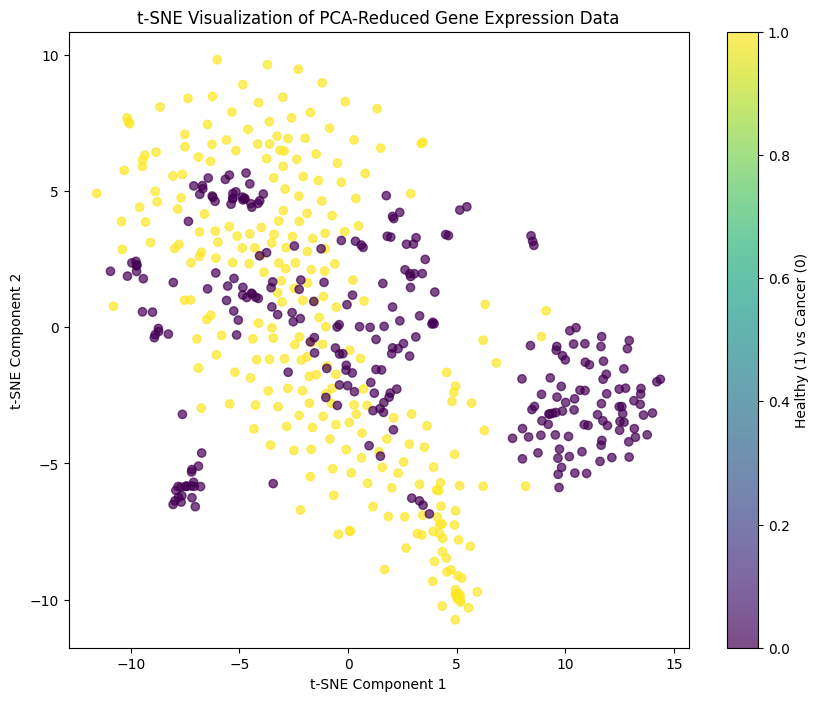


Logistic Regression:
CV Accuracy: 0.3132 ± 0.0581
Test Accuracy: 0.2932
Confusion Matrix:
[[36 33]
 [61  3]]

Decision Tree:
CV Accuracy: 0.7315 ± 0.0864
Test Accuracy: 0.7068
Confusion Matrix:
[[46 23]
 [16 48]]

Random Forest:
CV Accuracy: 0.7894 ± 0.0582
Test Accuracy: 0.7744
Confusion Matrix:
[[46 23]
 [ 7 57]]

SVM:
CV Accuracy: 0.7342 ± 0.0830
Test Accuracy: 0.7368
Confusion Matrix:
[[36 33]
 [ 2 62]]

KNN:
CV Accuracy: 0.5439 ± 0.0202
Test Accuracy: 0.5338
Confusion Matrix:
[[69  0]
 [62  2]]

Gradient Boosting:
CV Accuracy: 0.8896 ± 0.0297
Test Accuracy: 0.9323
Confusion Matrix:
[[63  6]
 [ 3 61]]

MLP:
CV Accuracy: 0.3382 ± 0.0471
Test Accuracy: 0.3083
Confusion Matrix:
[[36 33]
 [59  5]]


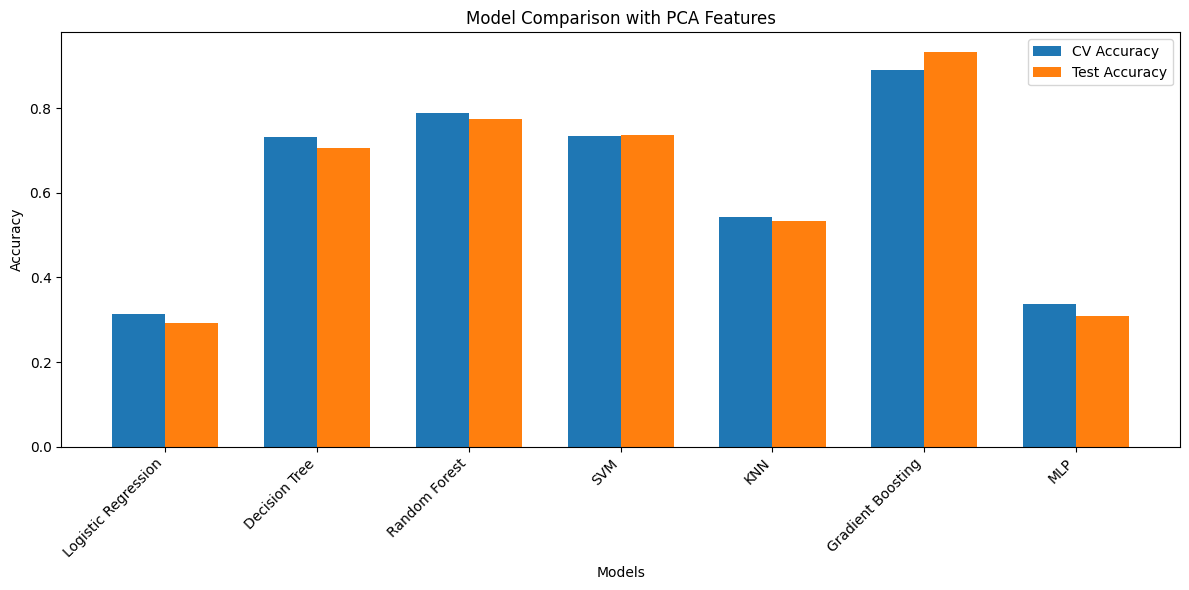

In [4]:
# Extract features and target
print(f"Dataset shape: {df.shape}")
print(f"Number of healthy samples: {df['healthy'].sum()}")
print(f"Number of cancer samples: {len(df) - df['healthy'].sum()}")

# Apply PCA for dimensionality reduction
# First determine optimal number of components for 95% variance
from sklearn.decomposition import PCA

# Create initial PCA to analyze variance explained
pca_analyzer = PCA().fit(df.drop(['patient_id', 'healthy'], axis=1))
explained_variance_ratio = np.cumsum(pca_analyzer.explained_variance_ratio_)

# Find number of components needed for 95% variance
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components}")

# Plot variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.show()

# Now apply PCA with the optimal number of components
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(df.drop(['patient_id', 'healthy'], axis=1))

# Create a DataFrame with PCA features
pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(n_components)])
pca_df['healthy'] = df['healthy'].values

# Preview the transformed data
print(f"PCA transformed data shape: {pca_df.shape}")
print(pca_df.head())

# Use PCA features for modeling
X = pca_df.drop(['healthy'], axis=1)
y = pca_df['healthy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TSNE for visualization (using the PCA-reduced data for speed)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Plot TSNE visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of PCA-Reduced Gene Expression Data')
plt.colorbar(scatter, label='Healthy (1) vs Cancer (0)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Create a dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=500, random_state=42)
}

# Create a pipeline with preprocessing for each model
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scale the data
        ('classifier', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit the model and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Store results
    results[name] = {
        'cv_accuracy': np.mean(cv_scores),
        'cv_std': np.std(cv_scores),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
for name, result in results.items():
    print(f"\n{name}:")
    print(f"CV Accuracy: {result['cv_accuracy']:.4f} ± {result['cv_std']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    
# Plot model comparison
models_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Accuracy': [results[name]['cv_accuracy'] for name in results],
    'Test Accuracy': [results[name]['test_accuracy'] for name in results]
})

plt.figure(figsize=(12, 6))
x = np.arange(len(models_df))
width = 0.35
plt.bar(x - width/2, models_df['CV Accuracy'], width, label='CV Accuracy')
plt.bar(x + width/2, models_df['Test Accuracy'], width, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison with PCA Features')
plt.xticks(x, models_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Testing Different Numbers of PCA Components

Let's systematically evaluate how many PCA components are needed for optimal model performance. We'll train models with varying numbers of components and compare their accuracy.

Training with 5 components...
Training with 10 components...
Training with 10 components...
Training with 15 components...
Training with 15 components...
Training with 20 components...
Training with 20 components...
Training with 25 components...
Training with 25 components...
Training with 30 components...
Training with 30 components...
Training with 35 components...
Training with 35 components...
Training with 40 components...
Training with 40 components...
Training with 45 components...
Training with 45 components...
Training with 50 components...
Training with 50 components...
Training with 55 components...
Training with 55 components...
Training with 60 components...
Training with 60 components...
Training with 65 components...
Training with 65 components...
Training with 70 components...
Training with 70 components...
Training with 75 components...
Training with 75 components...
Training with 80 components...
Training with 80 components...
Training with 85 components...
Training 

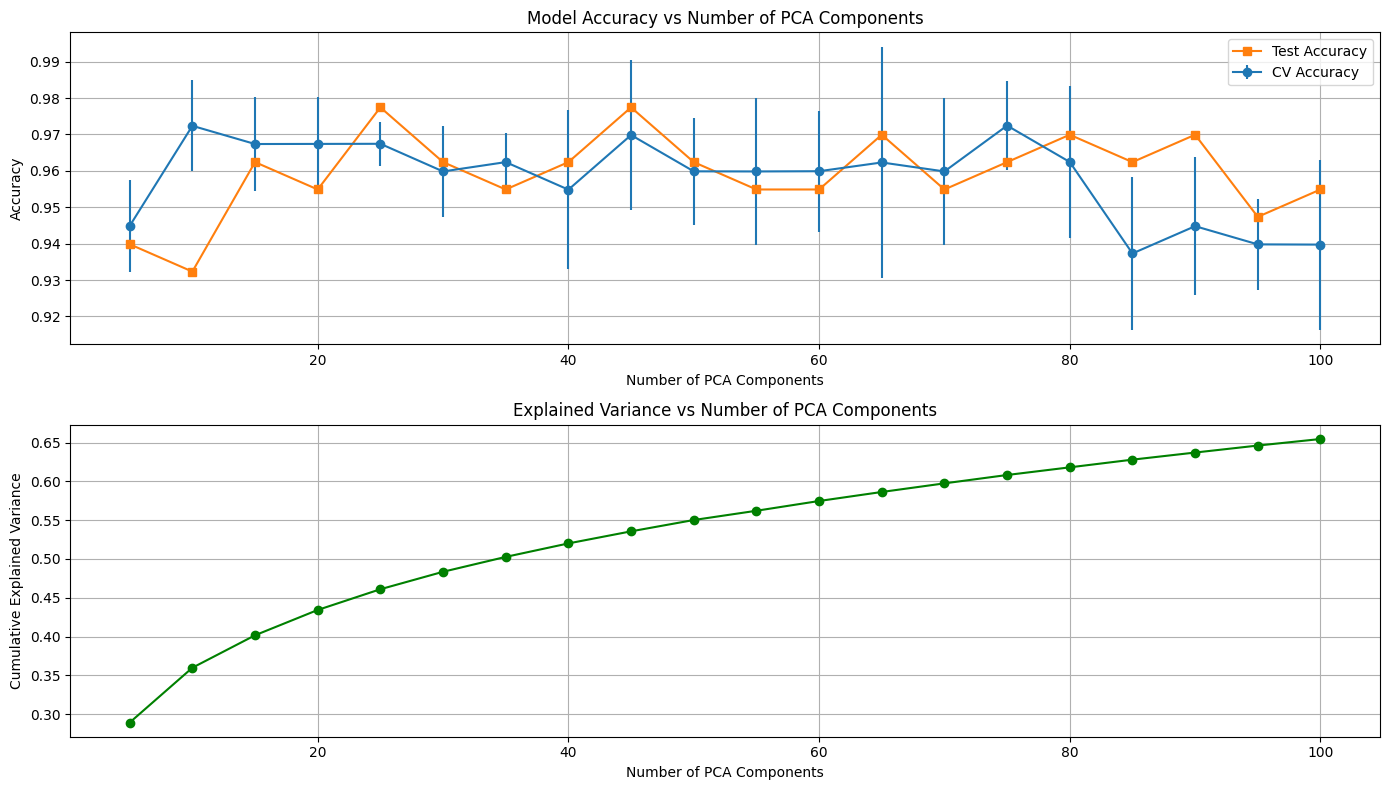


Optimal number of components: 25.0
Explained variance with optimal components: 0.4610
CV accuracy with optimal components: 0.9674 ± 0.0060
Test accuracy with optimal components: 0.9774

Using all 100.0 components:
Explained variance: 0.6547
CV accuracy: 0.9397 ± 0.0234
Test accuracy: 0.9549


In [5]:
# Let's try different numbers of components and see how model performance is affected
# We'll try a range of components from 5 up to the number needed for 95% variance

# Determine max number of components to try
max_components = min(100, n_components)  # Cap at 100 components for efficiency
component_range = list(range(5, max_components + 1, 5))  # From 5 to max_components in steps of 5

# Store results
component_results = {
    'n_components': [],
    'variance_explained': [],
    'cv_accuracy': [],
    'cv_std': [],
    'test_accuracy': []
}

# Choose best model from previous evaluation (typically Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model with different numbers of components
for n_comp in component_range:
    print(f"Training with {n_comp} components...")
    
    # Apply PCA with n_comp components
    pca = PCA(n_components=n_comp, random_state=42)
    X_pca = pca.fit_transform(df.drop(['patient_id', 'healthy'], axis=1))
    
    # Calculate explained variance
    var_explained = np.sum(pca.explained_variance_ratio_)
    
    # Create a DataFrame with PCA features
    pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(n_comp)])
    pca_df['healthy'] = df['healthy'].values
    
    # Use PCA features for modeling
    X = pca_df.drop(['healthy'], axis=1)
    y = pca_df['healthy']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', best_model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit the model and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    # Store results
    component_results['n_components'].append(n_comp)
    component_results['variance_explained'].append(var_explained)
    component_results['cv_accuracy'].append(np.mean(cv_scores))
    component_results['cv_std'].append(np.std(cv_scores))
    component_results['test_accuracy'].append(test_acc)

# Convert results to DataFrame
results_df = pd.DataFrame(component_results)
print(results_df)

# Plot results
plt.figure(figsize=(14, 8))

# Plot 1: Model Accuracy vs Number of Components
plt.subplot(2, 1, 1)
plt.errorbar(results_df['n_components'], results_df['cv_accuracy'], 
             yerr=results_df['cv_std'], marker='o', label='CV Accuracy')
plt.plot(results_df['n_components'], results_df['test_accuracy'], 
         marker='s', label='Test Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of PCA Components')
plt.grid(True)
plt.legend()

# Plot 2: Explained Variance vs Number of Components
plt.subplot(2, 1, 2)
plt.plot(results_df['n_components'], results_df['variance_explained'], marker='o', color='green')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal number of components
optimal_components = results_df.loc[results_df['test_accuracy'].idxmax()]
print(f"\nOptimal number of components: {optimal_components['n_components']}")
print(f"Explained variance with optimal components: {optimal_components['variance_explained']:.4f}")
print(f"CV accuracy with optimal components: {optimal_components['cv_accuracy']:.4f} ± {optimal_components['cv_std']:.4f}")
print(f"Test accuracy with optimal components: {optimal_components['test_accuracy']:.4f}")

# Compare to using all components for 95% variance
full_components = results_df.iloc[-1]
print(f"\nUsing all {full_components['n_components']} components:")
print(f"Explained variance: {full_components['variance_explained']:.4f}")
print(f"CV accuracy: {full_components['cv_accuracy']:.4f} ± {full_components['cv_std']:.4f}")
print(f"Test accuracy: {full_components['test_accuracy']:.4f}")

## Component Analysis Conclusions

The experiment above helps us understand how many PCA components are needed for optimal model performance. 

Some key observations:
1. The optimal number of components balances dimensionality reduction with preserving important information
2. Too few components may lose critical information for classification
3. Too many components may introduce noise and lead to overfitting
4. The point where the accuracy curve plateaus indicates a good number of components to use

Based on the results, we can select the optimal number of components that maximizes test accuracy while minimizing computational complexity.

# Testing Different Numbers of PCA Components with Multiple Models

Let's systematically evaluate how many PCA components are needed for optimal model performance using our two best performing classifiers: Random Forest and Gradient Boosting.

In [ ]:
# Let's try different numbers of components with both Random Forest and Gradient Boosting
# We'll try a range of components from 5 up to the number needed for 95% variance

# Determine max number of components to try
max_components = n_components  # Cap at 100 components for efficiency
component_range = list(range(5, max_components + 1, 5))  # From 5 to max_components in steps of 5

# Define the models to test
models_to_test = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Initialize results dictionary
results_by_model = {model_name: {
    'n_components': [],
    'variance_explained': [],
    'cv_accuracy': [],
    'cv_std': [],
    'test_accuracy': []
} for model_name in models_to_test.keys()}

# Train models with different numbers of components
for n_comp in component_range:
    print(f"Training with {n_comp} components...")
    
    # Apply PCA with n_comp components
    pca = PCA(n_components=n_comp, random_state=42)
    X_pca = pca.fit_transform(df.drop(['patient_id', 'healthy'], axis=1))
    
    # Calculate explained variance
    var_explained = np.sum(pca.explained_variance_ratio_)
    
    # Create a DataFrame with PCA features
    pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(n_comp)])
    pca_df['healthy'] = df['healthy'].values
    
    # Use PCA features for modeling
    X = pca_df.drop(['healthy'], axis=1)
    y = pca_df['healthy']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Test each model type
    for model_name, model in models_to_test.items():
        # Create pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        
        # Perform cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
        
        # Fit the model and make predictions
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        
        # Store results
        results_by_model[model_name]['n_components'].append(n_comp)
        results_by_model[model_name]['variance_explained'].append(var_explained)
        results_by_model[model_name]['cv_accuracy'].append(np.mean(cv_scores))
        results_by_model[model_name]['cv_std'].append(np.std(cv_scores))
        results_by_model[model_name]['test_accuracy'].append(test_acc)

# Convert results to DataFrames
results_dfs = {model_name: pd.DataFrame(results) for model_name, results in results_by_model.items()}

# Plot results
plt.figure(figsize=(16, 12))

# Plot 1: Model Accuracy vs Number of Components for both models
plt.subplot(2, 1, 1)
colors = ['blue', 'red']
markers = ['o', 's']
for i, (model_name, results_df) in enumerate(results_dfs.items()):
    plt.errorbar(
        results_df['n_components'], 
        results_df['cv_accuracy'], 
        yerr=results_df['cv_std'], 
        marker=markers[0], 
        linestyle='-',
        color=colors[i], 
        alpha=0.7,
        label=f'{model_name} - CV Accuracy'
    )
    plt.plot(
        results_df['n_components'], 
        results_df['test_accuracy'], 
        marker=markers[1], 
        linestyle='--',
        color=colors[i], 
        alpha=0.7,
        label=f'{model_name} - Test Accuracy'
    )

plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of PCA Components')
plt.grid(True)
plt.legend()

# Plot 2: Explained Variance vs Number of Components
plt.subplot(2, 1, 2)
plt.plot(
    results_dfs[list(results_dfs.keys())[0]]['n_components'], 
    results_dfs[list(results_dfs.keys())[0]]['variance_explained'], 
    marker='o', 
    color='green'
)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal number of components for each model
for model_name, results_df in results_dfs.items():
    optimal_components = results_df.loc[results_df['test_accuracy'].idxmax()]
    print(f"\n{model_name} - Optimal number of components: {optimal_components['n_components']}")
    print(f"Explained variance with optimal components: {optimal_components['variance_explained']:.4f}")
    print(f"CV accuracy with optimal components: {optimal_components['cv_accuracy']:.4f} ± {optimal_components['cv_std']:.4f}")
    print(f"Test accuracy with optimal components: {optimal_components['test_accuracy']:.4f}")

# Compare model performance with their optimal components
optimal_results = []
for model_name, results_df in results_dfs.items():
    best_idx = results_df['test_accuracy'].idxmax()
    optimal_results.append({
        'Model': model_name,
        'Optimal Components': results_df.loc[best_idx, 'n_components'],
        'Variance Explained': results_df.loc[best_idx, 'variance_explained'],
        'CV Accuracy': results_df.loc[best_idx, 'cv_accuracy'],
        'Test Accuracy': results_df.loc[best_idx, 'test_accuracy']
    })

# Create a summary DataFrame
optimal_df = pd.DataFrame(optimal_results)
print("\nSummary of optimal configurations:")
print(optimal_df)

# Plot comparison of optimal configurations
plt.figure(figsize=(10, 6))
x = np.arange(len(optimal_df))
width = 0.35

plt.bar(x - width/2, optimal_df['CV Accuracy'], width, label='CV Accuracy')
plt.bar(x + width/2, optimal_df['Test Accuracy'], width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Models with Their Optimal Number of Components')
plt.xticks(x, optimal_df['Model'] + ' (' + optimal_df['Optimal Components'].astype(str) + ' components)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Analysis of Model Performance with Different PCA Components

The analysis above helps us understand:

1. How Random Forest and Gradient Boosting performances compare across different numbers of PCA components
2. Which model achieves the best overall accuracy 
3. How many components are optimal for each model
4. The tradeoff between dimensionality reduction and model performance

This information is crucial for selecting the optimal model configuration that balances accuracy and computational efficiency for the brain tumor classification task.